In [317]:
import tensorflow as tf

In [318]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [319]:
img_array = cv2.imread("training/0/105")

In [320]:
Datadirectory = "training/"

Classes = ["0","1","2","3"]

In [321]:
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))

In [322]:
img_size = 224
new_array = cv2.resize(img_array, (img_size,img_size))

In [323]:
training_Data= []

In [324]:
def create_training_Data():
    for category in Classes:
        path=os.path.join(Datadirectory, category)
        class_num= Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array= cv2.resize(img_array, (img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [325]:
create_training_Data()

In [326]:
print(len(training_Data))

457


In [327]:
temp = np.array(training_Data)

C:\Users\user\AppData\Local\Temp\ipykernel_16220\2755283514.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  temp = np.array(training_Data)


In [328]:
temp.shape

(457, 2)

In [329]:
import random

random.shuffle(training_Data)

In [330]:
X=[]
Y=[]

for feature,label in training_Data:
    X.append(feature)
    Y.append(label)
    
X=np.array(X).reshape(-1,img_size,img_size,3)


In [331]:
X.shape

(457, 224, 224, 3)

In [332]:
X= X/255.0

In [333]:
Y[100]

0

In [334]:
Y[0]

0

In [335]:
Y= np.array(Y)

In [336]:
Y.shape

(457,)

In [337]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [338]:
model = tf.keras.applications.MobileNetV2()

In [339]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [340]:
base_input = model.layers[0].input

In [341]:
base_output = model.layers[-2].output

In [342]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d_5')>

In [343]:
final_output = layers.Dense(128)(base_output)
final_ouput = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_ouput)
final_ouput = layers.Activation('relu')(final_output)
final_output = layers.Dense(4,activation='softmax')(final_ouput)

In [344]:
final_output

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'dense_17')>

In [345]:
new_model = keras.Model(inputs = base_input, outputs= final_output)

In [346]:
new_model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                           

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [347]:
new_model.compile(loss="sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [348]:
new_model.fit(X,Y, epochs=15)

Epoch 1/15
15/15 [==============================] - 84s 5s/step - loss: 0.3079 - accuracy: 0.8775
Epoch 2/15
15/15 [==============================] - 74s 5s/step - loss: 0.0716 - accuracy: 0.9716
Epoch 3/15
15/15 [==============================] - 75s 5s/step - loss: 0.0277 - accuracy: 0.9934
Epoch 4/15
15/15 [==============================] - 73s 5s/step - loss: 0.0047 - accuracy: 0.9978
Epoch 5/15
15/15 [==============================] - 74s 5s/step - loss: 0.0218 - accuracy: 0.9956
Epoch 6/15
15/15 [==============================] - 78s 5s/step - loss: 0.1269 - accuracy: 0.9694
Epoch 7/15
15/15 [==============================] - 72s 5s/step - loss: 0.0572 - accuracy: 0.9847
Epoch 8/15
15/15 [==============================] - 73s 5s/step - loss: 0.0949 - accuracy: 0.9825
Epoch 9/15
15/15 [==============================] - 73s 5s/step - loss: 0.0332 - accuracy: 0.9956
Epoch 10/15
15/15 [==============================] - 73s 5s/step - loss: 0.0155 - accuracy: 0.9934
Epoch 11/15
15/15 [

In [349]:
new_model.save("Final_model5")

INFO:tensorflow:Assets written to: Final_model5\assets


INFO:tensorflow:Assets written to: Final_model5\assets


In [350]:
new_model = tf.keras.models.load_model("Final_model5")

In [359]:
frame = cv2.imread("411.jpg")

In [360]:
frame.shape

(308, 428, 3)

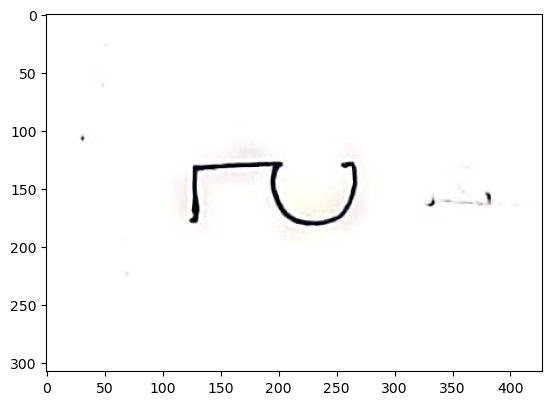

In [361]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [362]:
final_image = cv2.resize(frame, (224,224))
final_image = np.expand_dims(final_image,axis=0)
final_image = final_image/255.0

In [363]:
Predictions = new_model.predict(final_image)

1/1 [==============================] - 0s 81ms/step


In [364]:
Predictions[0]

array([2.0162712e-07, 9.9999952e-01, 1.4418788e-08, 1.8701833e-07],
      dtype=float32)

In [365]:
np.argmax(Predictions)

1